# IMPLEMENTING FEATURE SELECTION AND PREDICTION ON NSL KDD DATASET USING NAIVE BAYES AND SVM SUPERVISED LEARNING ALGORITHMS

### DATASET DESCRIPTION: NSL-KDD ,An effective benchmark data set to help researchers compare different intrusion detection method.

### link : https://www.kaggle.com/hassan06/nslkdd


### GOAL: PREDICTING INTRUSION OR NO INTRUSION USING FEATURE SELECTION METHODS


##### THE FOLLOWING STEPS ARE FOLLOWED:

### 1. VIEW NSL KDD DATASET

### 2. DATA PREPROCESSING

### 3. FEATURE SELECTION METHODS: FILTER, WRAPPER AND EMBEDDED 

### 4. COMPARING AND TRAINING WITH FEATURE SELECTION METHODS USING NAIVE BAYES AND SVM SUPERVISED LEARNING ALGORITHMS

### 5. CONFUSION MATRIX FOR PREDICTION(Sensitivity or recall, and Specificity which are True Positive,True Negativity,False Positive,False Negative).

In [3]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
#import random

#from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix







### 1. VIEW NSL KDD DATASET

#### import or load dataset

In [4]:
#import or load dataset
#file_path_full_training_set = 'C:/Users/admin/Desktop/1.TOTORIAL/PRACTICE new/projects/csc509/nsl_kdd data/KDDTrain+.txt'

#read csv
df = pd.read_csv("KDDTrain+.txt")

#view first five rows
df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


#### From the output above we see that the data columns are not labelled


####  Add the column labels

In [3]:
# add the column labels
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
            ,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
            ,'num_shells'
            ,'num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
            ,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate'
            ,'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate'
            ,'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate'
            ,'dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level'])

df.columns = columns


df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


#### view columns

In [6]:
#view columns
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'level'],
      dtype='object')

#### view total amount of rows and columns

In [7]:
#total amount of rows and colunms

total_rows=len(df.axes[0])

print("total rows", total_rows )


total_cols=len(df.axes[1])

print("total columns", total_cols )

total rows 125972
total columns 43


#### NOTE: Attack column is the target column for prediction

#### So lets view the attack column only

In [6]:
#### View Attack column 
df['attack'].value_counts()

normal             67342
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

### 2. DATA PREPROCESSING : We will perform data discretization or encoding, check for missing data, and Normalise using MInmax.

#### Firstly we check dataset for any categorical or object columns

In [6]:
#check datatypes
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

#### From output above we see that protocol_type, service , flag and attack columns are object.
#### so we need to encode them to numeric values this is where data discretization is done.

#### Since we will be predicting intrusion, and attack column is the target or predict column

#### map attack column normal to 0, all other attacks to 1

#### this means normal = 0 , 
#### Note: Normal = NO Intrusion,

#### not normal or all other attacks =1, 
#### Note: not Normal = INTRUSION

In [4]:

#Since we will be predicting intrusion, and attack column is the target or predict column

# map attack column normal to 0, all other attacks to 1

# this means normal = 0 , 
#Note: Normal = NO Intrusion,

# not normal or all other attacks =1, 
#Note: not Normal = INTRUSION

is_attack = df.attack.map(lambda a: 0 if a == 'normal' else 1)

#create new column called attack flag
df['attack_flag'] = is_attack

# view the new shape 
print(np.shape(df))





(125972, 44)


#### From output above we now have a new column called attack flag that contains 0 for normal or not intrusion and 1 for intrusion



### Data Encoding or Discretization using pd.get_dummies

In [5]:
#Encode entire dataset and drop attack column since it has been mapped above

#this only encodes the object columns to numeric in the dataset i.e "protocol_type, service and flag"

dfencoddata= pd.get_dummies(df.drop('attack',axis=1))

print (np.shape(dfencoddata))
print (dfencoddata.columns)
#view forst five rows
dfencoddata[:5]

(125972, 124)
Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'flag_REJ', 'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0',
       'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH'],
      dtype='object', length=124)


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


#### From output above, data encoding has been done on flag , protocol_type and service.
#### We now have 124 columns because of this.


### Check for Not a number(NAN) or missing data in dataset

In [1]:
#check for Not a number(NAN) or missing data in dataset
#False means that there are no missing data in the dataset

Missing_data= df.isnull().any().any()  


print(Missing_data)

NameError: name 'df' is not defined

#### from output above there are no missing data

### NORMALISE DATA: using MinMax : For every feature, the minimum value of that feature gets transformed into a 0, the maximum value gets transformed into a 1, and every other value gets transformed into a decimal between 0 and 1.

In [20]:
#### Normalize data
from sklearn.preprocessing import MinMaxScaler

#normalize before dropping the target columns in other to use for correlation feature selection
s = MinMaxScaler() 
s_for_correlation= scaler.fit_transform(dfencoddata)

#convert back to dataframe
s_for_correlation2 = pd.DataFrame(s_for_correlation, columns=dfencoddata.columns,index=df.index)



#normalise while dropping target columns and encode the rest of the data in other to use for other feature selection
drpped= df.drop(['attack_flag','attack'],axis=1)
dfencoded= pd.get_dummies(drpped)


scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(dfencoded)

print (np.shape(scaled_values))


#convert back to dataframe
scaled_values_to_df = pd.DataFrame(scaled_values, columns=dfencoded.columns,index=df.index)

#show first five rows of normalised data

scaled_values_to_df.head()

(125972, 123)


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### From output above the dataset have been normalised to values between 0s and 1s



### 3. FEATURE SELECTION

### Feature Selection methods are : 
### (i) Filter, 
### (ii) Wrapper 
### (iii) and Embedded

### (i). FILTER BASED METHOD:  such a metric could be correlation, and chi-square, others are : information gain

###  Correlation and chi-square will be done in this program.

#### Pearson correlation

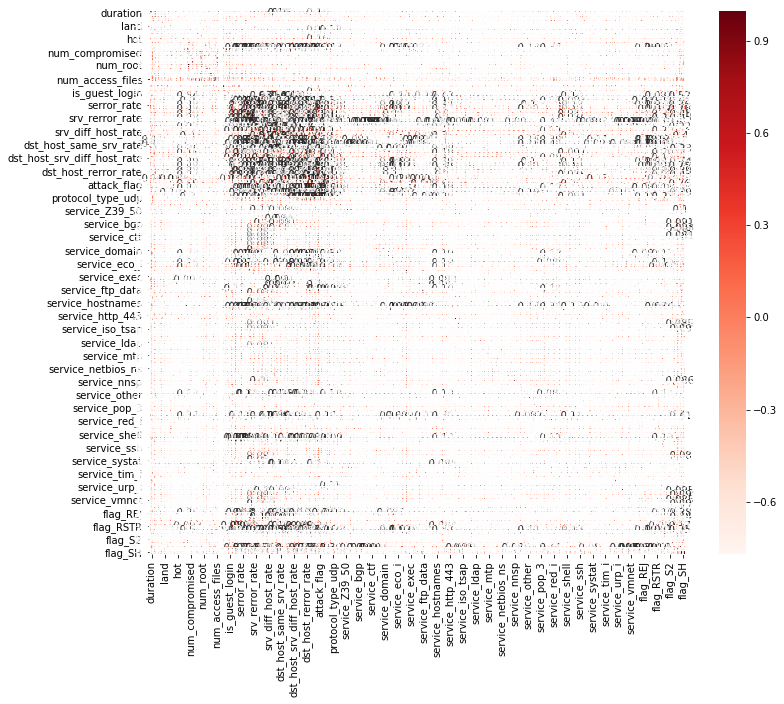

In [11]:
#using Pearson correlation
import seaborn as sns
plt.figure(figsize=(12,10))
cor = s_for_correlation2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [49]:
#Correlation with output variable
cor_target = abs(cor["attack_flag"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
print('Original feature number:', dfencoddata.shape[1])
print ("the relevant features are",len(relevant_features))
print ("the relevant features are",relevant_features)

Original feature number: 124
the relevant features are 13
the relevant features are logged_in                   0.690181
count                       0.576442
serror_rate                 0.650651
srv_serror_rate             0.648287
same_srv_rate               0.751912
dst_host_srv_count          0.722546
dst_host_same_srv_rate      0.693813
dst_host_serror_rate        0.651840
dst_host_srv_serror_rate    0.654984
attack_flag                 1.000000
service_http                0.562320
flag_S0                     0.650205
flag_SF                     0.756285
Name: attack_flag, dtype: float64


#### Above are the most correlated features selected

#### Chi square

In [26]:
#using chi square

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

#DEFINE X FOR FEATURES, AND Y FOR TARGET

X= scaled_values_to_df  #Feature Matrix
y = df["attack_flag"] #target

X_norm = MinMaxScaler().fit_transform(X)

#print(np.shape(X_norm))

chi_selector = SelectKBest(chi2, k=10)

chi_Features_for_training = chi_selector.fit_transform(X, y)

#print (np.shape(chi_Features_for_training))

chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()


print('Original feature number:', X.shape[1])



print(str(len(chi_feature)), 'selected features')




print(chi_feature)



Original feature number: 123
10 selected features
['logged_in', 'serror_rate', 'srv_serror_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'service_http', 'flag_S0', 'flag_SF']


#### chi square method selected 10 features as specified ,out of the 123 features

### (ii) .WRAPPER METHOD : They are: Recursive Feature (RFE),others are: Forward selection, Backward elimination ,Bi-directional elimination(Stepwise Selection) Elimination.

###  RFE will be done in this program



#### RFE

In [27]:
#using RFE
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest

model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)
#Transforming data using RFE

#DEFINE X FOR FEATURES, AND Y FOR TARGET

X= scaled_values_to_df  #Feature Matrix
y = df["attack_flag"] #target

rfe_for_training = rfe.fit_transform(X,y)  

#print (np.shape(rfe_for_training))

#Fitting the data to model

#print(rfe.support_)
#print(rfe.ranking_)

rfe_support = rfe.get_support()



rfe_feature = X.loc[:,rfe_support].columns.tolist()

print('Original feature number:', X.shape[1])



print(str(len(chi_feature)), 'selected features')

print(rfe_feature)

C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Original feature number: 123
10 selected features
['service_IRC', 'service_X11', 'service_domain_u', 'service_ftp_data', 'service_http', 'service_ntp_u', 'service_other', 'service_pop_3', 'service_smtp', 'service_tftp_u']


#### RFE method selected 10 features as specified ,out of the 123 features

### (iii). EMBEDDED METHOD: They are, Lasso and RandomForest (RF) .

#### Lasso


In [7]:
#using lasso
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

X= scaled_values_to_df  #Feature Matrix
y = df["attack_flag"] #target
scaler = StandardScaler()
scaler.fit(X)
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'))
sel_.fit(scaler.transform(X.fillna(0)), y)

lasso_for_training=sel_.fit_transform(X.fillna(0), y)


#print (np.shape(lasso_for_training))

sel_support = sel_.get_support()

#print(sel_support)

selected_feat = X.columns[(sel_.get_support())]


print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

print(selected_feat)

print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 123
selected features: 75
Index(['duration', 'land', 'wrong_fragment', 'hot', 'num_failed_logins',
       'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
       'num_root', 'num_file_creations', 'num_shells', 'is_guest_login',
       'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'level',
       'protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp',
       'service_IRC', 'service_X11', 'service_auth', 'service_domain',
       'service_domain_u', 'service_eco_i', 'service_ecr_i', 'service_finger',
       'service_ftp', 'service_ftp_data', 'service_gopher', 

#### lasso automatically selected 75 features 

#### Random forest (RF) 

In [30]:
#using random forest
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier


X= scaled_values_to_df   #Feature Matrix
y = df["attack_flag"] #target

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100))
embeded_rf_selector.fit(X, y)

rf_for_training=embeded_rf_selector.fit_transform(X, y)
#print (np.shape(rf_for_training))


embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')
print(embeded_rf_feature)

28 selected features
['src_bytes', 'dst_bytes', 'logged_in', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'diff_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'level', 'protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'service_ecr_i', 'service_http', 'service_private', 'flag_S0', 'flag_SF']


#### Random forest automatically selected 28 features 

### 4.  COMPARING AND TRAINING WITH FEATURE SELECTION METHODS USING NAIVE BAYES AND SVM SUPERVISED LEARNING ALGORITHMS

### We will Compare the accuracy of training using the features selected by: 
### (i) Filter method(Chi square),
### (ii) wrapper method(RFE),
### (iii) and Embedded method (LASSO) above

#### 4(i) Using FILTER METHOD (chisquare) for training

In [22]:

#Using filter method chisquare

X2=chi_Features_for_training

print (np.shape(X2))

y = df['attack_flag']

print (np.shape(y))





(125972, 10)
(125972,)


#### build the training and testing sets (80% For training, 20% for testing)

In [23]:
# build the training and testing sets (80% For training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2)

#### Based on the 10 features specified in chisquare

#### training with Gausian Naive Bayes ML algorithm

In [24]:
#using gausian Naive Bayes with chisquare feature selection
from sklearn.naive_bayes import GaussianNB
binary_model =  GaussianNB()
binary_model.fit(X_train, y_train)
binary_predictions = binary_model.predict(X_test)

train_acc = binary_model.score(X_train, y_train) # mean acc on train data
# calculate and display our base accuracty
base_rf_score = accuracy_score(binary_predictions,y_test)
base_rf_score

print("Training accuracy of naive bayes for chisquare (Filter method) Feature selection is:", train_acc )
print("Testing accuracy of naive bayes for chisquare (Filter method) Feature selection is:", base_rf_score)

Training accuracy of naive bayes for chisquare (Filter method) Feature selection is: 0.8926640007144487
Testing accuracy of naive bayes for chisquare (Filter method) Feature selection is: 0.8918833101805914


#### training with SVM ML algorithm

In [25]:
#using SVM with chisuare feature selection
# model for the binary classification
#IMPORT A SVM ALGORITHM

from sklearn.svm import LinearSVC

binary_model = LinearSVC() 
binary_model.fit(X_train, y_train)
binary_predictions = binary_model.predict(X_test)

train_acc = binary_model.score(X_train, y_train) # mean acc on train data
# calculate and display our base accuracty
base_rf_score = accuracy_score(binary_predictions,y_test)
base_rf_score

print("Training accuracy of SVM for Chisquare (Filter method) Feature selection is:", train_acc )
print("Testing accuracy of SVM for Chisquare (filter method) feature selection is:", base_rf_score)

Training accuracy of SVM for Chisquare (Filter method) Feature selection is: 0.9089276322970519
Testing accuracy of SVM for Chisquare (filter method) feature selection is: 0.9083151418932328


#### 4(ii)  Using WRAPPER method (RFE) for training

In [31]:
#Using Wrapper method RFE

X=rfe_for_training

print (np.shape(X))

y = df['attack_flag']

print (np.shape(y))





(125972, 10)
(125972,)


#### build the training and testing sets (80% For training, 20% for testing)

In [32]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Based on the 10 features specified by RFE

#### training with Gausian Naive Bayes ML algorithm

In [33]:
#using gausian Naive Bayes with RFE Feature Selection
from sklearn.naive_bayes import GaussianNB
binary_model =  GaussianNB()
binary_model.fit(X_train, y_train)
binary_predictions = binary_model.predict(X_test)

train_acc = binary_model.score(X_train, y_train) # mean acc on train data
# calculate and display our base accuracty
base_rf_score = accuracy_score(binary_predictions,y_test)
base_rf_score

print("Training accuracy Of naive bayes for RFE (wrapper method) Feature selection is:", train_acc )
print("Testing accuracy naive bayes for RFE (wrapper method) Feature selection is:", base_rf_score)

Training accuracy Of naive bayes for RFE (wrapper method) Feature selection is: 0.5943022713515981
Testing accuracy naive bayes for RFE (wrapper method) Feature selection is: 0.5966660051597539


#### training with SVM ML algorithm

In [11]:
#using SVM with chisuare feature selection
# model for the binary classification
#IMPORT A SVM ALGORITHM
from sklearn.svm import LinearSVC

binary_model = LinearSVC() 
binary_model.fit(X_train, y_train)
binary_predictions = binary_model.predict(X_test)

train_acc = binary_model.score(X_train, y_train) # mean acc on train data
# calculate and display our base accuracty
base_rf_score = accuracy_score(binary_predictions,y_test)
base_rf_score

print("Training accuracy SVM for RFE (wrapper method) Feature selection is:", train_acc )
print("Testing accuracy SVM for RFE (wrapper method) Feature selection is:", base_rf_score)

Training accuracy SVM for RFE (wrapper method) Feature selection is: 0.91005884279151
Testing accuracy SVM for RFE (wrapper method) Feature selection is: 0.9100218297281206


#### 4(iii) Using embedded method (Lasso) for training


In [8]:
#Using lasso

X=lasso_for_training

print (np.shape(X))

y = df['attack_flag']

print (np.shape(y))




(125972, 75)
(125972,)


#### build the training and testing sets (80% For training, 20% for testing)

In [9]:
# build the training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


#### Based on the 75 features automatically selected by lasso

#### training with Gausian Naive Bayes ML algorithm

In [17]:
#using gausian Naive Bayes with RFE Feature Selection
from sklearn.naive_bayes import GaussianNB
binary_model =  GaussianNB()
binary_model.fit(X_train, y_train)
binary_predictions = binary_model.predict(X_test)

train_acc = binary_model.score(X_train, y_train) # mean acc on train data
# calculate and display our base accuracty
base_rf_score = accuracy_score(binary_predictions,y_test)
base_rf_score

print("Training accuracy Of naive bayes for lasso(embedded method) Feature selection is:", train_acc )
print("Testing accuracy naive bayes for lasso(embedded method) Feature selection is:", base_rf_score)

Training accuracy Of naive bayes for lasso(embedded method) Feature selection is: 0.9501175863540292
Testing accuracy naive bayes for lasso(embedded method) Feature selection is: 0.9499900773963088


#### training with SVM ML algorithm

In [10]:
#using SVM with chisuare feature selection
# model for the binary classification
#IMPORT A SVM ALGORITHM
from sklearn.svm import LinearSVC

binary_model = LinearSVC() 
binary_model.fit(X_train, y_train)
binary_predictions = binary_model.predict(X_test)

train_acc = binary_model.score(X_train, y_train) # mean acc on train data
# calculate and display our base accuracty
base_rf_score = accuracy_score(binary_predictions,y_test)
base_rf_score

print("Training accuracy SVM for lasso(embedded method) Feature selection is:", train_acc )
print("Testing accuracy SVM for lasso(embedded method) Feature selection is:", base_rf_score)

Training accuracy SVM for lasso(embedded method) Feature selection is: 0.9719578872163291
Testing accuracy SVM for lasso(embedded method) Feature selection is: 0.9712244492954951


C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


#### Output: SVM TOOK TO LONG TO TRAIN because of dataset size!

### COMPARING THE TRAIN AND TEST ACCURACY FOR THE THREE METHODS:

### 1. USING NAIVES BAYES ML ALGORITHM

### (I) FILTER METHOD (CHISQUARE): Training accuracy  is: 0.8926640007144487, Testing accuracy is: 0.8918833101805914

### (II) WRAPPER METHOD (RFE): Training accuracy is: 0.5943022713515981 , Testing accuracy  is:  0.5966660051597539

### (III) EMBEDDED METHOD (LASSO): Training accuracy  is: 0.9501175863540292, Testing accuracy  is: 0.9499900773963088

### FROM THE ABOVE EMBEDDED METHOD (LASSO) HAS THE HIGHEST ACCURACY

### 2. USING SVM ML ALGORITHM


### (I) FILTER METHOD (CHISQUARE): Training accuracy  is: 0.9089276322970519 , Testing accuracy is: 0.9083151418932328

### (II) WRAPPER METHOD (RFE): Training accuracy is:  0.91005884279151  , Testing accuracy  is: 0.9100218297281206 

### (III) EMBEDDED METHOD (LASSO): Training accuracy  is: 0.9719578872163291 , Testing accuracy  is: 0.9712244492954951

### FROM THE ABOVE EMBEDDED METHOD (LASSO) HAS THE HIGHEST ACCURACY





### 5. CONFUSION MATRIX FOR PREDICTION USING EMBEDDED METHOD (LASSO)  SVM ALGORITHM BECAUSE IT HAS  THE HIGHEST ACCURACY FOR SENSITIVITY AND SPECIFICITY

In [11]:
# a helper function for getting some analytical data about our predictions
def add_predictions(data_set,predictions,y):
    prediction_series = pd.Series(predictions, index=y.index)

    # we need to add the predicted and actual outcomes to the data
    predicted_vs_actual = data_set.assign(predicted=prediction_series)
    original_data = predicted_vs_actual.assign(actual=y).dropna()
    conf_matrix = confusion_matrix(original_data['actual'], 
                                   original_data['predicted'])
    
    # capture rows with failed predictions
    base_errors = original_data[original_data['actual'] != original_data['predicted']]
    
    # drop columns with no value
    non_zeros = base_errors.loc[:,(base_errors != 0).any(axis=0)]

    # idetify the type of error
    false_positives = non_zeros.loc[non_zeros.actual==0]
    false_negatives = non_zeros.loc[non_zeros.actual==1]

    # put everything into an object
    prediction_data = {'data': original_data,
                       'confusion_matrix': conf_matrix,
                       'errors': base_errors,
                       'non_zeros': non_zeros,
                       'false_positives': false_positives,
                       'false_negatives': false_negatives}
    return prediction_data

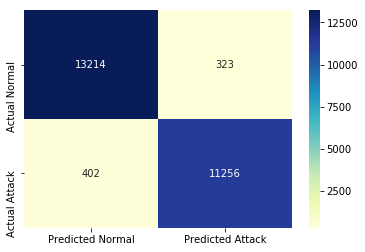

In [12]:
# capture our prediction data
binary_prediction_data = add_predictions(df,
                                        binary_predictions,
                                         y_test)

# create a heatmap of the confusion matrix
sns.heatmap(data=binary_prediction_data['confusion_matrix'],
            xticklabels = ['Predicted Normal','Predicted Attack'],
            yticklabels = ['Actual Normal','Actual Attack'],
            cmap="YlGnBu",
            fmt='d',
            annot=True)

### Values needed to calculate Sensitivity and Specificity 

#### From the above confusion matrix, the Sensitivity and Specificity values are

#### true positives (TP): These are cases in which we predicted yes (there is intrusion), and it is correct= 11256

#### true negatives (TN): We predicted no intrusion, and it is correct= 13214

#### false positives (FP): We predicted yes (there is intrusion), but it is incorrect= 323

#### false negatives (FN): We predicted no intrusion, but it is incorrect= 402

### Calculating Sensitivity or Recall value
#### Sensitivity is a measure of the proportion of actual positive cases that got predicted as positive (or true positive)
#### Sensitivity = (True Positive)/(True Positive + False Negative)

In [19]:
tp = 11256
fn =402
#the recall formular is
Recall= tp/(tp+fn)

print ("the recall  or sensitivity is", Recall)

the recall  or sensitivity is 0.9655172413793104


### Calculating Specificity value
#### Specificity is defined as the proportion of actual negatives, which got predicted as the negative (or true negative)
#### Specificity = (True Negative)/(True Negative + False Positive)

In [20]:

TN = 13214
FP =323

Specificity = (TN)/(TN + FP)

print ("the Specificity is", Specificity)

the Specificity is 0.9761394696018321


### OR 
### LIBRARY TO CALCULATE BOTH SENSITIVITY AND SPECIFICITY

In [26]:
###  LIBRARY TO CALCULATE BOTH SENSITIVITY AND SPECIFICITY
from sklearn.metrics import precision_recall_fscore_support as score



precision, recall, fscore, support = score(y_test,binary_predictions )


print('Sensitivity and Specificity: {}'.format(recall))


Sensitivity and Specificity: [0.97613947 0.96551724]
